F1 score: 0.944
Recall score: 0.9365079365079365
Precision score: 0.9516129032258065
Balanced accuracy score: 0.9543650793650793
Confusion matrix:


/Users/amneetdeol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


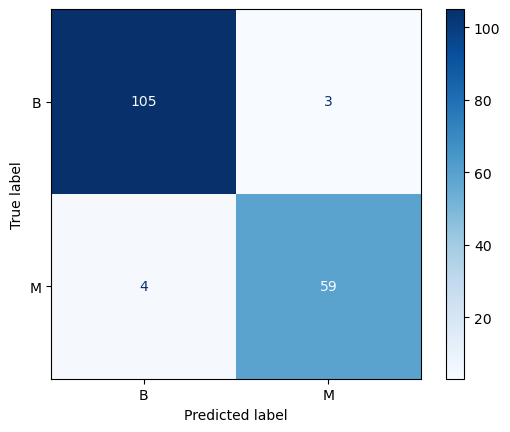

AUC score: 0.9921369782480893


/Users/amneetdeol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


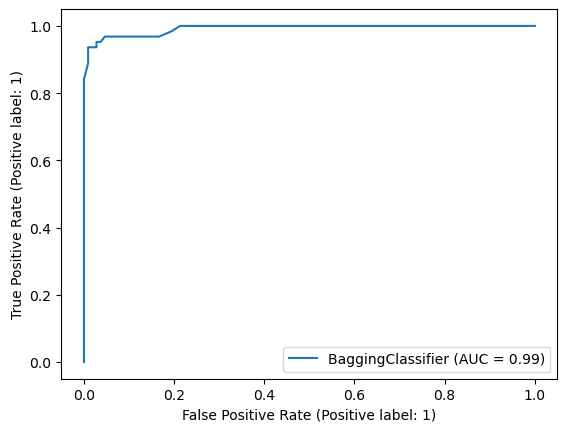

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

# Load data from CSV file
data = pd.read_csv('breast-cancer.csv')

# Separate features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0}) # convert to 0 and 1 labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=1)

# Create a bagging classifier with decision tree base estimator
bag_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=1)

k = 10
cv_scores = cross_val_score(bag_clf, X, y, cv=k)

# Fit the classifier to the training data
bag_clf.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = bag_clf.predict(X_test)


print("F1 score:", f1_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Balanced accuracy score:", balanced_accuracy_score(y_test, y_pred))
print("Confusion matrix:")
plot_confusion_matrix(bag_clf, X_test, y_test, display_labels=['B', 'M'], cmap=plt.cm.Blues)
plt.show()

# Calculate and print the AUC score
y_prob = bag_clf.predict_proba(X_test)[:,1]
print("AUC score:", roc_auc_score(y_test, y_prob))

# Plot ROC curve
plot_roc_curve(bag_clf, X_test, y_test)
plt.show()

In [2]:
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.96491228 0.87719298 0.92982456 0.92982456 1.         0.96491228
 0.96491228 0.98245614 0.96491228 0.98214286]

Average Cross-Validation Score: 0.9561090225563911
